•	Завантажити файли з даними у папку проекту з посилання:
https://github.com/oreillymedia/doing_data_science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean


df = pd.read_csv('nyt10.csv')
print(df.head())

   Age  Gender  Impressions  Clicks  Signed_In
0   59       1            4       0          1
1    0       0            7       1          0
2   19       0            5       0          1
3   44       1            5       0          1
4   30       1            4       0          1


•  Створіть нову змінну age_group, яка агрегує користувачів як <18, 18–24, 25–34, 35–44, 45–54, 55–64 та 65+.

In [2]:
df['age_group'] = np.zeros(len(df['Age']))
pd.options.mode.chained_assignment = None

a = []
a_male = 0
a_female = 0

signed_in = []
unsigned = []

for i in range(0, len(df['Age'])):
    if df['Age'][i] < 18:
        df['age_group'][i] = 1
    elif 18 <= df['Age'][i] < 24:
        df['age_group'][i] = 2
        a.append(df['Gender'][i])
        if df['Gender'][i] == 0:
            a_female += 1
        else:
            a_male += 1
    elif 25 <= df['Age'][i] < 34:
        df['age_group'][i] = 3
    elif 35 <= df['Age'][i] < 44:
        df['age_group'][i] = 4
    elif 45 <= df['Age'][i] < 54:
        df['age_group'][i] = 5
    elif 55 <= df['Age'][i] < 64:
        df['age_group'][i] = 6
    else:
        df['age_group'][i] = 7
    if df['Signed_In'][i] == 1:
        signed_in.append(df['Age'][i])
    else:
        unsigned.append(df['Age'][i])

print(df.head())

   Age  Gender  Impressions  Clicks  Signed_In  age_group
0   59       1            4       0          1        6.0
1    0       0            7       1          0        1.0
2   19       0            5       0          1        2.0
3   44       1            5       0          1        7.0
4   30       1            4       0          1        3.0


•	Зафіксуйте на діаграмі кількість показів та показник переходів (CTR = #clicks/#inmpressions) для цих шести
вікових категорій

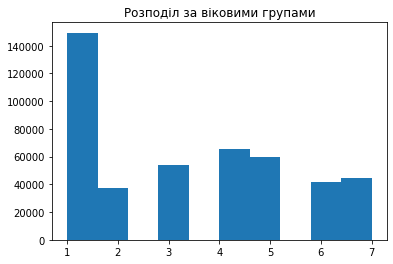

In [3]:
plt.title('Розподіл за віковими групами')
plt.hist(df['age_group'])
plt.show()

•	Вивчіть дані та проведіть візуальні та кількісні порівняння між сегментами користувачів/демографічними групами (наприклад, чоловіки старше 18 років у порівнянні з жінками старше 18 років або авторизовані та неавторизовані користувачі).

Жінок у віці від 18 до 24 років 17600, чоловіків 19681


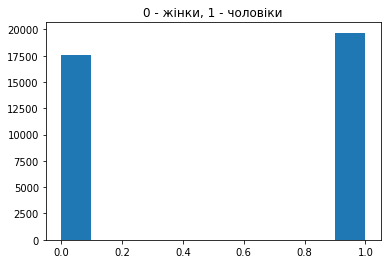

In [4]:
print(f"Жінок у віці від 18 до 24 років {a_female}, чоловіків {a_male}")
plt.title('0 - жінки, 1 - чоловіки')
plt.hist(a)
plt.show()

•	Створіть метрики/вимірювання/статистику, які підсумовують дані. Приклади можливих метрик включають CTR, 
квантил, середнє значення, медіану, дисперсію та максимальне значення. Ці показники потрібно розрахувати за 
різними сегментами користувачів. Подумайте про елементи, які важливо відстежувати з часом - що стискає дані, 
але, як і раніше, захоплює поведінку користувача.

In [6]:
print('Для зареєстрованих користувачів')
print(f'Середнє значення віку {mean(signed_in)}, квантиль віку {np.quantile(signed_in, 0.25)}, дисперсія віку {np.var(signed_in)}')

print('Для не зареєстрованих користувачів')
print(f'Середнє значення віку {mean(unsigned)}, квантиль віку {np.quantile(unsigned, 0.25)}, дисперсія віку {np.var(unsigned)}')

Для зареєстрованих користувачів
Середнє значення віку 42, квантиль віку 29.0, дисперсія віку 267.05397874007014
Для не зареєстрованих користувачів
Середнє значення віку 0, квантиль віку 0.0, дисперсія віку 0.0


•	Результати статистичного дослідження подати у вигляді результуючого ДатаФрейма (одного), дивлячись на який можна зрозуміти і порівнювати дані за віковими підкатегоріями.

In [ ]:
df.to_csv('new_10.csv')

Бачимо, що найбільша вікова група – до 18 років, майже в 2 рази перебільшує інші. У 2гій віковій категорії від 18 до 24 бачимо,
що великої переваги немає, але чоловіків трохи більше. За статистичними характеристиками можемо зрозуміти, що середній вік 
зареєстрованої людини 42р, а не зареєстрованої визначити не вдалось, бо, проаналізувавши дані бачимо такі записи, які рахуються в статистику, але викривляють її.